In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [52]:
data = pd.read_csv('Tiempos_promedio.csv')

In [53]:
X = data[['GGrr (s)']].values


In [54]:
y = data['Tiempo promedio'].values

In [14]:
grado = 2
poly = PolynomialFeatures(degree=grado)
X_poly = poly.fit_transform(X)

In [15]:
modelo = LinearRegression()
modelo.fit(X_poly, y)

LinearRegression()

In [7]:
y_pred = modelo.predict(X_poly)

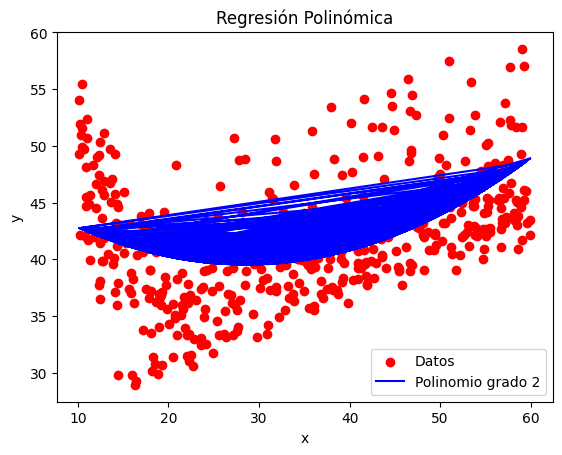

In [8]:
# Graficar
plt.scatter(X, y, color='red', label='Datos')
plt.plot(X, y_pred, color='blue', label=f'Polinomio grado {grado}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(mse)
print(r2)

21.018627075329327
0.2342076695937122


In [50]:
n=20

mses = []
r2s = []

for i in range(1,n+1):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    modelo = LinearRegression()
    modelo.fit(X_poly, y)
    y_pred = modelo.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mses.append(mse)
    r2 = r2_score(y, y_pred)
    r2s.append(r2)
    print(f"La regresión de grado {i} tiene un error cuadrático medio de {mse}")
    print(f"La regresión de grado {i} tiene coeficiente de determinación de {r2}")

La regresión de grado 1 tiene un error cuadrático medio de 24.364227471873868
La regresión de grado 1 tiene coeficiente de determinación de 0.11231411702741545
La regresión de grado 2 tiene un error cuadrático medio de 21.018627075329327
La regresión de grado 2 tiene coeficiente de determinación de 0.2342076695937122
La regresión de grado 3 tiene un error cuadrático medio de 18.222307293357687
La regresión de grado 3 tiene coeficiente de determinación de 0.3360887408322204
La regresión de grado 4 tiene un error cuadrático medio de 17.40604496682114
La regresión de grado 4 tiene coeficiente de determinación de 0.36582842968159257
La regresión de grado 5 tiene un error cuadrático medio de 17.327185561432273
La regresión de grado 5 tiene coeficiente de determinación de 0.36870159202520136
La regresión de grado 6 tiene un error cuadrático medio de 17.315918719212714
La regresión de grado 6 tiene coeficiente de determinación de 0.36911208797856276
La regresión de grado 7 tiene un error cuad

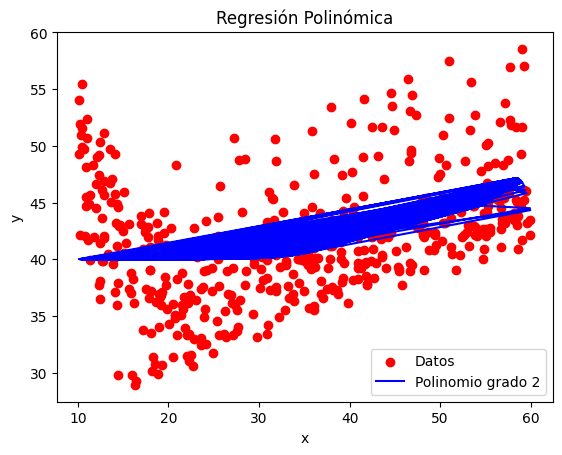

In [24]:
# Graficar
plt.scatter(X, y, color='red', label='Datos')
plt.plot(X, y_pred, color='blue', label=f'Polinomio grado {grado}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

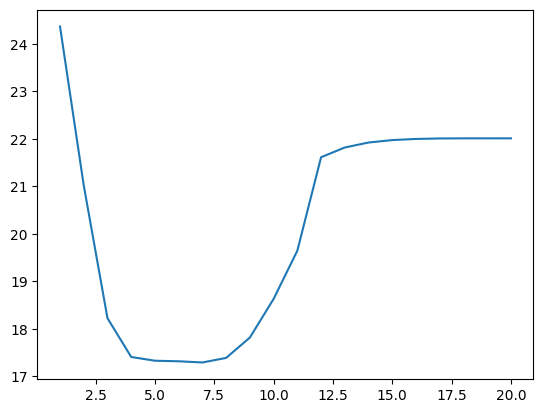

In [29]:
plt.plot(range(1,n+1), mses)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

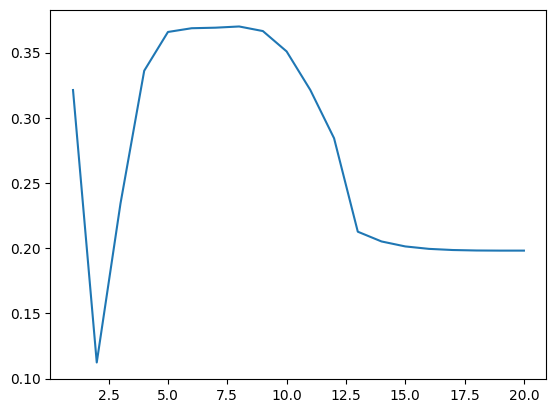

In [26]:
plt.plot(range(1,n+1), r2s)
plt.show

In [72]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
modelo = LinearRegression()
modelo.fit(X_poly, y)
y_pred = modelo.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"La regresión de grado {7} tiene un error cuadrático medio de {mse}")
print(f"La regresión de grado {7} tiene coeficiente de determinación de {r2}")

La regresión de grado 7 tiene un error cuadrático medio de 17.290406318117782
La regresión de grado 7 tiene coeficiente de determinación de 0.3700416064013755


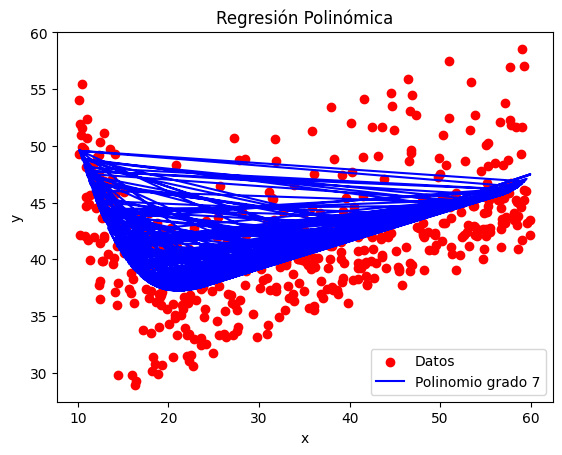

In [56]:
# Graficar
plt.scatter(X, y, color='red', label='Datos')
plt.plot(X, y_pred, color='blue', label=f'Polinomio grado 7')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()

In [73]:
coeficientes =modelo.coef_
print(modelo.coef_)

[ 0.00000000e+00 -7.59885944e-02 -6.97203884e-01  6.40020149e-02
 -2.55261867e-03  5.30250867e-05 -5.61823072e-07  2.40138679e-09]


In [74]:
X_poly

array([[1.00000000e+00, 3.75764835e+01, 1.41199211e+03, ...,
        7.49170511e+07, 2.81511933e+09, 1.05782285e+11],
       [1.00000000e+00, 4.54366427e+01, 2.06448850e+03, ...,
        1.93656096e+08, 8.79908282e+09, 3.99800783e+11],
       [1.00000000e+00, 1.23959752e+01, 1.53660200e+02, ...,
        2.92687037e+05, 3.62814124e+06, 4.49743487e+07],
       ...,
       [1.00000000e+00, 4.35237418e+01, 1.89431610e+03, ...,
        1.56182053e+08, 6.79762737e+09, 2.95858179e+11],
       [1.00000000e+00, 4.94046217e+01, 2.44081665e+03, ...,
        2.94332278e+08, 1.45413748e+10, 7.18411124e+11],
       [1.00000000e+00, 3.29995669e+01, 1.08897142e+03, ...,
        3.91328249e+07, 1.29136627e+09, 4.26145278e+10]])

In [75]:
X.shape

(500, 1)

In [76]:
X

array([[37.57648346],
       [45.43664273],
       [12.39597517],
       [16.94007695],
       [20.29816094],
       [53.19097225],
       [39.10150414],
       [14.97970269],
       [26.9611974 ],
       [58.10450494],
       [10.76026124],
       [25.61712015],
       [41.22052024],
       [55.06099537],
       [35.01573546],
       [55.18274965],
       [34.98616892],
       [52.30422989],
       [17.42821345],
       [38.20209627],
       [10.45057744],
       [49.90240652],
       [40.91783549],
       [19.78377168],
       [22.8580719 ],
       [33.19534579],
       [25.45149979],
       [29.74846448],
       [50.01130092],
       [18.19564433],
       [33.7012768 ],
       [17.23160374],
       [48.43590829],
       [36.19147994],
       [30.8842229 ],
       [17.90417833],
       [56.79999225],
       [14.44455387],
       [27.21665719],
       [36.76626333],
       [39.58622401],
       [24.93029945],
       [57.68511014],
       [27.65850446],
       [14.34216172],
       [56

In [77]:
modelo.intercept_

np.float64(77.2990693925243)

In [78]:
modelo.coef_

array([ 0.00000000e+00, -7.59885944e-02, -6.97203884e-01,  6.40020149e-02,
       -2.55261867e-03,  5.30250867e-05, -5.61823072e-07,  2.40138679e-09])

In [79]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
modelo = LinearRegression()
modelo.fit(X_poly, y)
y_pred = modelo.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"La regresión de grado {7} tiene un error cuadrático medio de {mse}")
print(f"La regresión de grado {7} tiene coeficiente de determinación de {r2}")
coeficientes =modelo.coef_
print(modelo.coef_)

La regresión de grado 7 tiene un error cuadrático medio de 17.290406318117782
La regresión de grado 7 tiene coeficiente de determinación de 0.3700416064013755
[ 0.00000000e+00 -7.59885944e-02 -6.97203884e-01  6.40020149e-02
 -2.55261867e-03  5.30250867e-05 -5.61823072e-07  2.40138679e-09]


In [96]:
def f(x):
    sum = modelo.intercept_
    for i in range(1, len(modelo.coef_)):
        sum += x**(i)*modelo.coef_[i]
    return sum

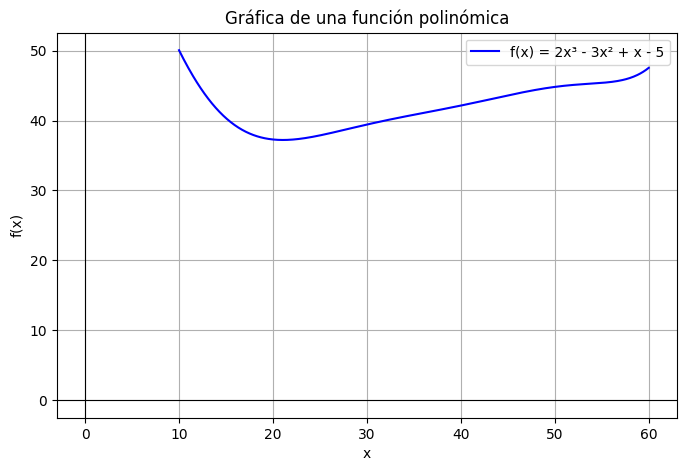

In [98]:
x = np.linspace(10, 60, 500)
y = f(x)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x) = 2x³ - 3x² + x - 5', color='blue')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Gráfica de una función polinómica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

<method-wrapper '__len__' of list object at 0x000001EC7810EEC0>